# Insurance claim classification problem

                                                                                                  (Reg Id: 2003258)

In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

### Loading the data from CE802_P2_Data

In [235]:
data = pd.read_csv('C:\PC\ML_Project\CE802_P2_Data\CE802_P2_Data.csv');
test = pd.read_csv('C:\PC\ML_Project\CE802_P2_Data\CE802_P2_Test.csv');

### Imputation methods for missing data:

Replacing a missing value in column F15 with its mean 

In [236]:
data_mean_imputation = data.copy()
data_mean_imputation['F15'] =  data_mean_imputation['F15'].fillna(data_mean_imputation['F15'].mean())

#Dropping the entire feature F15 as a baseline approach
data_baseline = data_mean_imputation.drop(labels='F15',axis =1)

In this case, Using a regression model to predict the missing values in the column F15

In [237]:
#Here , Data is partitioned into two sets, one that has values in column F15 (data_notnull) 
#and other with missing values (data_null).
#considering F15 as a target variable, data_notnull dataset is used to train linear regression model 
#and trained model is used to predict missing values in the second dataset data_null
data_notnull = data.loc[~data['F15'].isna()]
data_null = data.loc[data['F15'].isna()]


In [238]:
X_notnull = data_notnull.loc[:,'F1':'F14']
y_notnull= data_notnull.loc[:,'F15']
X_test_null  = data_null.loc[:,'F1':'F14']
X_train, X_test, y_train, y_test = train_test_split(X_notnull, y_notnull, test_size=0.30)

In [239]:
# As can be seen below, our model is almost 40% better than the simple mean repleacement(coefficient of determination 
#is used a metric)
lin_reg = LinearRegression();
lin_reg.fit(X_train,y_train);
y_pred1 = lin_reg.predict(X_test)
r2_score(y_test,y_pred1)

0.3222975593046743

In [240]:
#Missing values are predicted using the trained model and both the datasets are combined.
F15_pred = lin_reg.predict(X_test_null)
data_null.loc[:,'F15'] = F15_pred
data_imp = pd.concat([data_notnull,data_null])

C:\Users\user\anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### Data Splitting 

In [241]:
#columns from F1 to F15 are fetaures and Class is a target variable 
# and data is partitioned into train and test set in 70:30 ratio
X = data_imp.loc[:,'F1':'F15']
y = data_imp.loc[:,'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

#Mean imputation split
X_mean =data_mean_imputation.loc[:,'F1':'F15']
y_mean = data_mean_imputation.loc[:,'Class']
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.30,random_state=0)

#Baseline approach split
X_baseline =data_baseline.loc[:,'F1':'F14']
y_baseline = data_baseline.loc[:,'Class']
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.30,random_state=0)


### Feature Scaling 

In [242]:
# Feature scaling for alogorithms svm ,logistic regression and KNN and various impuatation data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc.fit(X_train_mean)
X_train_mean_std = sc.transform(X_train_mean)
X_test_mean_std = sc.transform(X_test_mean)

sc.fit(X_train_baseline)
X_train_baseline_std = sc.transform(X_train_baseline)
X_test_baseline_std = sc.transform(X_test_baseline)

sca = MinMaxScaler()
sca.fit(X_train)
X_train_sca = sca.transform(X_train)
X_test_sca = sca.transform(X_test)

### Model Selection

Here, Various models are trained and tested with diffrent imputation methods and performance is displayed in a
tabular format

##### Decision Tree

In [243]:
clf = tree.DecisionTreeClassifier(min_samples_split=20,min_samples_leaf=10,random_state=0)
cv_score_dt = cross_val_score(clf,X_train, y_train,cv=10)
clf.fit(X_train,y_train)
y_pred_dt =clf.predict(X_test)
acc_score_dt =accuracy_score(y_test,y_pred_dt,normalize= True) * 100.0

cv_score_dt_mean = cross_val_score(clf,X_train_mean, y_train_mean,cv=10)
clf.fit(X_train_mean,y_train_mean)
y_pred_dt_mean =clf.predict(X_test_mean)
acc_score_dt_mean = accuracy_score(y_test_mean,y_pred_dt_mean,normalize= True) * 100.0

cv_score_dt_baseline = cross_val_score(clf,X_train_baseline, y_train_baseline,cv=10)
clf.fit(X_train_baseline,y_train_baseline)
y_pred_dt_baseline =clf.predict(X_test_baseline)
acc_score_dt_baseline = accuracy_score(y_test_baseline,y_pred_dt_baseline,normalize= True) * 100.0

print('\033[1m' + 'DecisionTree Classifier\n ' + '\033[0m')
print('                          '+ '    Regression Imputation'+'    Mean Replacement'+ '      Baseline\n')
print('Cross validation accuracy:     ' + str(cv_score_dt.mean() * 100.0) + '     ' +
      str(cv_score_dt_mean.mean()*100.0)+'    '+ str(cv_score_dt_baseline.mean()*100.0) )
print('Test set accuracy:             '+  str(accuracy_score(y_test,y_pred_dt,normalize= True) * 100.0)+ '     '+
      str(accuracy_score(y_test_mean,y_pred_dt_mean,normalize= True) * 100.0)+'    '+
      str(accuracy_score(y_test_baseline,y_pred_dt_baseline,normalize= True) * 100.0))

DecisionTree Classifier
 
                              Regression Imputation    Mean Replacement      Baseline

Cross validation accuracy:     81.52380952380952     78.57142857142858    74.95238095238095
Test set accuracy:             82.44444444444444     77.77777777777779    75.33333333333333


##### Gradient Boosting

In [244]:
gbc = GradientBoostingClassifier(n_estimators=120, learning_rate=1,max_depth=3, random_state=0)

cv_score_gbc = cross_val_score(gbc,X_train, y_train,cv=10)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
acc_score_gbc = accuracy_score(y_test,y_pred_gbc,normalize= True) * 100.0

gbc_mean = GradientBoostingClassifier(n_estimators=120, learning_rate=1,max_depth=3, random_state=0)
cv_score_gbc_mean = cross_val_score(gbc_mean,X_train_mean, y_train_mean,cv=10)
gbc_mean.fit(X_train_mean,y_train_mean)
y_pred_gbc_mean =gbc_mean.predict(X_test_mean)
acc_score_gbc_mean = accuracy_score(y_test_mean,y_pred_gbc_mean,normalize= True) * 100.0

gbc_baseline = GradientBoostingClassifier(n_estimators=120, learning_rate=1,max_depth=3, random_state=0)
cv_score_gbc_baseline = cross_val_score(gbc_baseline,X_train_baseline, y_train_baseline,cv=10)
gbc_baseline.fit(X_train_baseline,y_train_baseline)
y_pred_gbc_baseline =gbc_baseline.predict(X_test_baseline)
acc_score_gbc_baseline = accuracy_score(y_test_baseline,y_pred_gbc_baseline,normalize= True) * 100.0

print('\033[1m' + 'GradientBoosting Classifier\n ' + '\033[0m')
print('                          '+ '   Regression Imputation'+'    Mean Replacement'+ '      Baseline\n')
print('Cross validation accuracy:     ' + str(cv_score_gbc.mean() * 100.0) + '     ' +
      str(cv_score_gbc_mean.mean()*100.0)+'    '+ str(cv_score_gbc_baseline.mean()*100.0) )
print('Test set accuracy:             '+  str(accuracy_score(y_test,y_pred_gbc,normalize= True) * 100.0)+ '     '+
      str(accuracy_score(y_test_mean,y_pred_gbc_mean,normalize= True) * 100.0)+'    '+
      str(accuracy_score(y_test_baseline,y_pred_gbc_baseline,normalize= True) * 100.0))

GradientBoosting Classifier
 
                             Regression Imputation    Mean Replacement      Baseline

Cross validation accuracy:     87.23809523809523     86.95238095238095    85.52380952380952
Test set accuracy:             85.77777777777777     90.44444444444444    86.66666666666667


##### Random Forest

In [245]:
rf = RandomForestClassifier(n_estimators=120, 
                               bootstrap = True,max_depth=20,
                               max_features = 'sqrt',random_state=0)

cv_score_rf = cross_val_score(rf,X_train, y_train,cv=10)
rf.fit(X_train,y_train);
y_pred_rf = rf.predict(X_test)
acc_score_rf = accuracy_score(y_test,y_pred_rf,normalize= True) * 100.0

cv_score_rf_mean = cross_val_score(rf,X_train_mean, y_train_mean,cv=10)
rf.fit(X_train_mean,y_train_mean)
y_pred_rf_mean =rf.predict(X_test_mean)
acc_score_rf_mean = accuracy_score(y_test_mean,y_pred_rf_mean,normalize= True) * 100.0

cv_score_rf_baseline = cross_val_score(rf,X_train_baseline, y_train_baseline,cv=10)
rf.fit(X_train_baseline,y_train_baseline)
y_pred_rf_baseline =rf.predict(X_test_baseline)
acc_score_rf_baseline =accuracy_score(y_test_baseline,y_pred_rf_baseline,normalize= True) *100.0

print('\033[1m' + 'RandomForest Classifier\n ' + '\033[0m')
print('                        '+ '   Regression Imputation'+'    Mean Replacement'+ '      Baseline')
print('Cross validation accuracy:     ' + str(cv_score_rf.mean() * 100.0) + '     ' +
      str(cv_score_rf_mean.mean()*100.0)+'    '+ str(cv_score_rf_baseline.mean()*100.0) )
print('Test set accuracy:             '+  str(accuracy_score(y_test,y_pred_rf,normalize= True) * 100.0)+ '     '+
      str(accuracy_score(y_test_mean,y_pred_rf_mean,normalize= True) * 100.0)+'    '+
      str(accuracy_score(y_test_baseline,y_pred_rf_baseline,normalize= True) * 100.0))

RandomForest Classifier
 
                           Regression Imputation    Mean Replacement      Baseline
Cross validation accuracy:     86.47619047619047     85.14285714285717    82.57142857142856
Test set accuracy:             86.66666666666667     86.44444444444444    82.88888888888889


##### Logistic Regression

In [246]:
lg = LogisticRegression(max_iter=100);

cv_score_lg = cross_val_score(lg,X_train_std, y_train,cv=10)
lg.fit(X_train_std,y_train);
y_pred_lg = lg.predict(X_test_std)
acc_score_lg =accuracy_score(y_test,y_pred_lg,normalize= True) * 100.0

cv_score_lg_mean = cross_val_score(lg,X_train_mean_std, y_train_mean,cv=10)
lg.fit(X_train_mean_std,y_train_mean)
y_pred_lg_mean =lg.predict(X_test_mean_std)
acc_score_lg_mean = accuracy_score(y_test_mean,y_pred_lg_mean,normalize= True) * 100.0

cv_score_lg_baseline = cross_val_score(lg,X_train_baseline_std, y_train_baseline,cv=10)
lg.fit(X_train_baseline_std,y_train_baseline)
y_pred_lg_baseline =lg.predict(X_test_baseline_std)
acc_score_lg_baseline = accuracy_score(y_test_baseline,y_pred_lg_baseline,normalize= True) * 100.0

print('\033[1m' + 'Logistic Regression\n ' + '\033[0m')
print('                        '+ '   Regression Imputation'+'    Mean Replacement'+ '      Baseline')
print('Cross validation accuracy:     ' + str(cv_score_lg.mean() * 100.0) + '     ' +
      str(cv_score_lg_mean.mean()*100.0)+'    '+ str(cv_score_lg_baseline.mean()*100.0) )
print('Test set accuracy:             '+  str(accuracy_score(y_test,y_pred_lg,normalize= True) * 100.0)+ '     '+
      str(accuracy_score(y_test_mean,y_pred_lg_mean,normalize= True) * 100.0)+'    '+
      str(accuracy_score(y_test_baseline,y_pred_lg_baseline,normalize= True) * 100.0))


Logistic Regression
 
                           Regression Imputation    Mean Replacement      Baseline
Cross validation accuracy:     84.19047619047619     82.38095238095238    79.52380952380953
Test set accuracy:             85.11111111111111     85.55555555555556    81.77777777777779


##### SVM

In [247]:
from sklearn import svm

svm = svm.SVC(kernel='linear')
cv_score_svm = cross_val_score(svm,X_train_std, y_train,cv=10)
svm.fit(X_train_std,y_train);
y_pred_svm = svm.predict(X_test_std)
acc_score_svm = accuracy_score(y_test,y_pred_svm,normalize= True) * 100.0

cv_score_svm_mean = cross_val_score(svm,X_train_mean_std, y_train_mean,cv=10)
svm.fit(X_train_mean_std,y_train_mean)
y_pred_svm_mean =svm.predict(X_test_mean_std)
acc_score_svm_mean = accuracy_score(y_test_mean,y_pred_svm_mean,normalize= True) * 100.0


cv_score_svm_baseline = cross_val_score(svm,X_train_baseline_std, y_train_baseline,cv=10)
svm.fit(X_train_baseline_std,y_train_baseline)
y_pred_svm_baseline =svm.predict(X_test_baseline_std)
acc_score_svm_baseline = accuracy_score(y_test_baseline,y_pred_svm_baseline,normalize= True) * 100.0


print('\033[1m' + 'SVM\n ' + '\033[0m')
print('                            '+ '   Regression Imputation'+'    Mean Replacement'+ '      Baseline\n')
print('Cross validation accuracy:     ' + str(cv_score_svm.mean() * 100.0) + '     ' +
      str(cv_score_svm_mean.mean()*100.0)+'    '+ str(cv_score_svm_baseline.mean()*100.0) )
print('Test set accuracy:             '+  str(accuracy_score(y_test,y_pred_svm,normalize= True) * 100.0)+ '     '+
      str(accuracy_score(y_test_mean,y_pred_svm_mean,normalize= True) * 100.0)+'    '+
      str(accuracy_score(y_test_baseline,y_pred_svm_baseline,normalize= True) * 100.0))


SVM
 
                               Regression Imputation    Mean Replacement      Baseline

Cross validation accuracy:     85.33333333333333     83.6190476190476    78.66666666666667
Test set accuracy:             85.33333333333334     86.44444444444444    81.77777777777779


##### KNN

In [248]:
knn = KNeighborsClassifier(n_neighbors=5)
cv_score_knn = cross_val_score(knn,X_train_std, y_train,cv=10)
knn.fit(X_train_std,y_train);
y_pred_knn = knn.predict(X_test_std)
acc_score_knn = accuracy_score(y_test,y_pred_knn,normalize= True) * 100.0

cv_score_knn_mean = cross_val_score(knn,X_train_mean_std, y_train_mean,cv=10)
knn.fit(X_train_mean_std,y_train_mean)
y_pred_knn_mean =knn.predict(X_test_mean_std)
acc_score_knn_mean = accuracy_score(y_test_mean,y_pred_knn_mean,normalize= True) * 100.0

cv_score_knn_baseline = cross_val_score(knn,X_train_baseline_std, y_train_baseline,cv=10)
knn.fit(X_train_baseline_std,y_train_baseline)
y_pred_knn_baseline =knn.predict(X_test_baseline_std)
acc_score_knn_baseline =accuracy_score(y_test_baseline,y_pred_knn_baseline,normalize= True) * 100.0

print('\033[1m' + 'KNN\n ' + '\033[0m')
print('                           '+ '   Regression Imputation'+'    Mean Replacement'+ '      Baseline\n')
print('Cross validation accuracy:     ' + str(cv_score_knn.mean() * 100.0) + '     ' +
      str(cv_score_knn_mean.mean()*100.0)+'    '+ str(cv_score_knn_baseline.mean()*100.0) )
print('Test set accuracy:             '+  str(accuracy_score(y_test,y_pred_knn,normalize= True) * 100.0)+ '     '+
      str(accuracy_score(y_test_mean,y_pred_knn_mean,normalize= True) * 100.0)+'    '+
      str(accuracy_score(y_test_baseline,y_pred_knn_baseline,normalize= True) * 100.0))


KNN
 
                              Regression Imputation    Mean Replacement      Baseline

Cross validation accuracy:     79.33333333333333     73.71428571428572    66.95238095238096
Test set accuracy:             82.66666666666667     76.88888888888889    73.33333333333333


### Performance plot 

the Bar chart below describes how models under test performed for a given data.
And also how they behaved with various imputation methods 

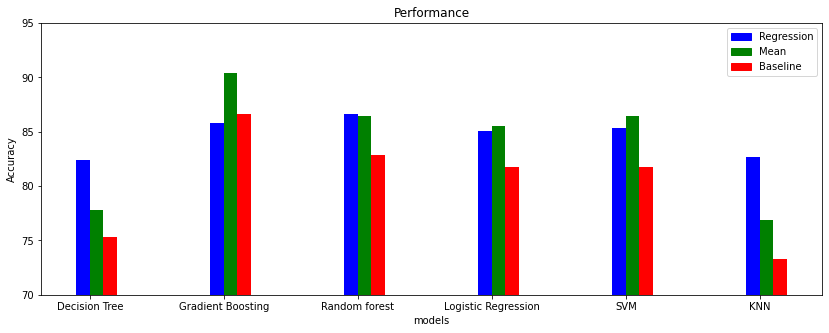

In [249]:
import matplotlib.pyplot as plt
N = 6

reg_score =      [acc_score_dt, acc_score_gbc, acc_score_rf,acc_score_lg, acc_score_svm, acc_score_knn]
mean_score =     [acc_score_dt_mean, acc_score_gbc_mean, acc_score_rf_mean, acc_score_lg_mean,
                  acc_score_svm_mean,acc_score_knn_mean]
baseline_score = [acc_score_dt_baseline, acc_score_gbc_baseline, acc_score_rf_baseline,acc_score_lg_baseline,
                  acc_score_svm_baseline,acc_score_knn_baseline]

data = [reg_score,mean_score,baseline_score]
X = np.arange(N)
width = 0.10


plt.bar(X+0.00, data[0], width, color='b', label='Regression')
plt.bar(X+0.10, data[1], width, color='g', label='Mean')
plt.bar(X+0.20, data[2], width, color='r', label='Baseline')
plt.xticks(X + width / 2, ('Decision Tree','Gradient Boosting','Random forest','Logistic Regression','SVM','KNN'))
plt.ylabel('Accuracy')
plt.xlabel('models')
plt.title('Performance')
plt.ylim([70,95])
plt.rcParams["figure.figsize"] = (14,5)

colors = {'Regression':'blue', 'Mean':'green','Baseline':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()


### Test Set Prediction

As it can be clearly seen in the above camparision analysis , Gradient boosting classifaction model 
is giving the highest accuracy , So we will use it to predict on test set.
And Like we did in camparision analysis,missing values in fature F15 is predicted using linear regression 

In [250]:
#split data set to predict missing values 
test_notnull = test.loc[~test['F15'].isna()]
test_null = test.loc[test['F15'].isna()]

In [251]:
# Predict the missing values using linear regression model and replace them with NAN in test set 
X_test = test_notnull.loc[:,'F1':'F14']
y_test = test_notnull.loc[:,'F15']



sca1 = MinMaxScaler()
sca1.fit(X_test)
X_test_sca = sca1.transform(X_test)

lin_reg_test = LinearRegression()
lin_reg_test.fit(X_test_sca,y_test)

X_test_null = test_null.loc[:,'F1':'F14']
X_test_null_sca = sca1.transform(X_test_null)

y_test_null = lin_reg_test.predict(X_test_null_sca)
test_null['F15'] = y_test_null

test_imp = pd.concat([test_notnull,test_null])

<ipython-input-251-7559190c20d2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_null['F15'] = y_test_null


In [252]:
# Predicting the traget variable (Class) and add them to test set
X_test_imp = test_imp.loc[:,'F1':'F15']
test_imp['Class'] = gbc.predict(X_test_imp)

In [253]:
#Export the testset to csv file
test_imp.to_csv('C:\PC\ML_Project\CE802_P2_Test.csv')